In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import ipywidgets as widgets

def get_config():
    with open("config.yml", "r") as my_config:
        config = yaml.safe_load(my_config)
    return config
config = get_config()
        
df_before_ph = pd.read_csv(config['ph'])
df_before_plaque = pd.read_csv(config['plaque'])
df_before_gum_bleeding = pd.read_csv(config['gum_bleeding'])
df_lifesum = pd.read_csv(config['lifesum'])

df_after_ph = pd.read_csv(config['ph'])
df_after_plaque = pd.read_csv(config['plaque'])
df_after_gum_bleeding = pd.read_csv(config['gum_bleeding'])

# Specified colors (corrected hex codes)
colors = ['#FE7F2D', '#619B8A', '#FCCA46', '#A1C181', '#233D4D']

In [2]:

# Cleanup and preparation
df_before_ph_cleaned = df_before_ph.dropna()
df_after_ph_cleaned = df_after_ph.dropna()

df_before_ph_sorted = df_before_ph_cleaned.sort_values(by='Weeks')
df_after_ph_sorted = df_after_ph_cleaned.sort_values(by='Weeks')

weeks_before = df_before_ph_sorted['Weeks']
weeks_after = df_after_ph_sorted['Weeks']

participants = df_before_ph_sorted.columns[1:].tolist()

# Function to plot data for selected participant
def plot_data(participant):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    if participant in df_before_ph_sorted.columns:
        axes[0].plot(weeks_before, df_before_ph_sorted[participant], marker='o', label='Before', color='blue')
        axes[0].set_title(f'{participant} - Before')
        axes[0].set_xlabel('Weeks')
        axes[0].set_ylabel('pH Values')
        axes[0].legend()
        
    if participant in df_after_ph_sorted.columns:
        axes[1].plot(weeks_after, df_after_ph_sorted[participant], marker='o', label='After', color='green')
        axes[1].set_title(f'{participant} - After')
        axes[1].set_xlabel('Weeks')
        axes[1].legend()
    
    plt.tight_layout()
    plt.show()

# Create a Dropdown widget for participants
participant_selector = widgets.Dropdown(
    options=participants,
    value=participants[0],
    description='Participant:',
)

# Widget interaction
widgets.interactive(plot_data, participant=participant_selector)

interactive(children=(Dropdown(description='Participant:', options=('Participant 1', 'Participant 2', 'Partici…

In [ ]:
# Convert 'Yes'/'No' to 1/0
df_gum_bleeding.replace({'Yes': 1, 'yes': 1, 'No': 0, 'NO': 0, 'no': 0}, inplace=True)

# Create violin plot for each participant with specified colors
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_gum_bleeding, palette=colors)
plt.xlabel('Participants')
plt.ylabel('Count of Yes Responses')
plt.title('Violin Plot of Yes Responses for Each Participant')
plt.xticks(rotation=45)
plt.show()

# Make a scatter plot for each participant. On the x-as the date and on the y-as the yes/no value. Maybe for each participant a differnt colour, show maybe show them toghter. 

In [3]:
# Cleanup and preparation
df_before_plaque_cleaned = df_before_plaque.dropna()
df_after_plaque_cleaned = df_after_plaque.dropna()

df_before_plaque_sorted = df_before_plaque_cleaned.sort_values(by='Weeks')
df_after_plaque_sorted = df_after_plaque_cleaned.sort_values(by='Weeks')

weeks_before = df_before_plaque_sorted['Weeks']
weeks_after = df_after_plaque_sorted['Weeks']

participants = df_before_plaque_sorted.columns[1:].tolist()

# Function to plot data for selected participant
def plot_data(participant):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    if participant in df_before_ph_sorted.columns:
        axes[0].plot(weeks_before, df_before_plaque_sorted[participant], marker='o', label='Before', color='blue')
        axes[0].set_title(f'{participant} - Before')
        axes[0].set_xlabel('Weeks')
        axes[0].set_ylabel('Amount of tooth with plaque')
        axes[0].legend()
        
    if participant in df_after_plaque_sorted.columns:
        axes[1].plot(weeks_after, df_after_plaque_sorted[participant], marker='o', label='After', color='green')
        axes[1].set_title(f'{participant} - After')
        axes[1].set_xlabel('Weeks')
        axes[1].legend()
    
    plt.tight_layout()
    plt.show()

# Create a Dropdown widget for participants
participant_selector = widgets.Dropdown(
    options=participants,
    value=participants[0],
    description='Participant:',
)

# Widget interaction
widgets.interactive(plot_data, participant=participant_selector)


interactive(children=(Dropdown(description='Participant:', options=('Participant 1', 'Participant 2', 'Partici…

/tmp/ipykernel_398752/3454416594.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_consumption = df_lifesum.mean()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (4,).

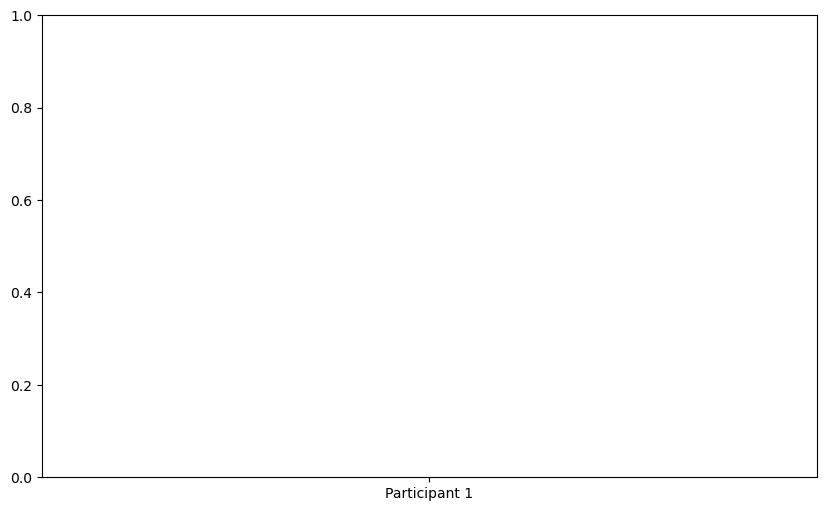

In [8]:
def plot_lactobacillus_consumption_avg(df_lifesum):
    participants = df_lifesum.columns[1:]

    # Replace null values with 0
    df_lifesum.fillna(0, inplace=True)

    # Compute average consumption for each person
    avg_consumption = df_lifesum.mean()

    plt.figure(figsize=(10, 6))
    plt.bar(participants, avg_consumption[1:], color='skyblue')  # Plotting bar chart, excluding the first value
    plt.title('Average Consumption of Lactobacillus for Each Person')
    plt.xlabel('Participants')
    plt.ylabel('Average Consumption')
    plt.xticks(rotation=45)
    plt.grid(axis='y')  # Add gridlines along y-axis
    plt.show()

# Plot average consumption of lactobacillus for each person
plot_lactobacillus_consumption_avg(df_lifesum)

TypeError: unhashable type: 'numpy.ndarray'

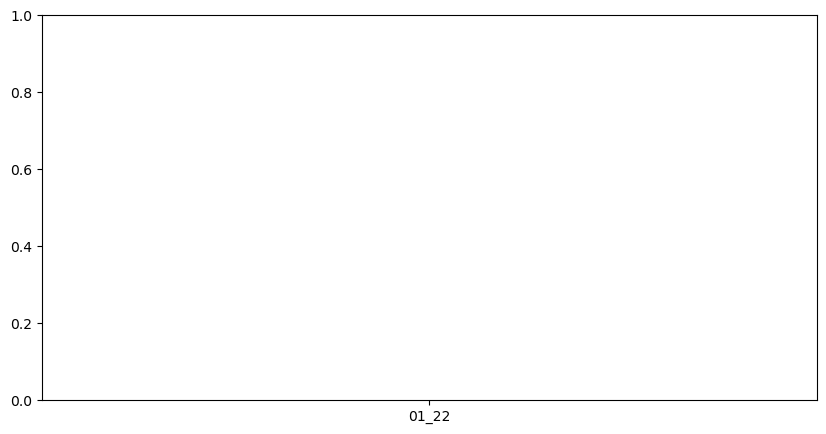

In [6]:
#plot for gumbleeding

def plot_participants(df):
    colors = ['red' if status == 'Yes' else 'blue' for status in df.iloc[:, 1:].values.flatten()]

#plot the data
    plt.figure(figsize=(10,5))
    plt.plot(df['Weeks'],df.iloc[:, 1:], marker='o', linestyle='-',color='black')
    for i, paricipant in enumerate(df.columns[1:]):
        plt.scatter(df['Weeks'], df[paricipant], color=colors[i::len(df.columns)-1])
    plt.title(' Amount of gum bleeing baseline period')
    plt.xlabel('Weeks')
    plt.ylabel('participant')
    plt.xticks(rotation=45)
    plt.legend(df.columns[1:])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_participants(df_before_gum_bleeding)


In [9]:
df_after_gum_bleeding.head()

,Weeks,Participant 1,Participant 2,Participant 3,Participant 4,Participant 5
0,01_22,No,No,Yes,No,No
1,01_23,Yes,No,Yes,No,No
2,01_24,Yes,No,No,No,No
3,01_25,Yes,No,No,Yes,No
4,01_26,No,Yes,No,No,No
